In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
from pandas.io.json import json_normalize
import math
from numpy import nan
import numpy as np
import json

In [2]:
from sshtunnel import SSHTunnelForwarder

with open('config.json', 'r') as file:
    config_data = json.load(file)
    
server = SSHTunnelForwarder(
    config_data['VM_IP'],
    ssh_username=config_data['REDDIT_USER_NAME'],
    ssh_password=config_data['VM_PASSWORD'],
    remote_bind_address=(config_data['MONGO_HOSTIP'], config_data['MONGO_PORTNUMBER'])
)

server.start()

In [3]:
client = pymongo.MongoClient(config_data['MONGO_HOSTIP'], server.local_bind_port)

mydb = client['movieData']

reddit_collection = mydb['reddit']

Create a dataframe from pickle file named df_reddit

In [4]:

datapoints = list(reddit_collection.find({}))

dataframe = json_normalize(datapoints)

dataframe.to_pickle("reddit_data.pkl")

df_reddit = pd.read_pickle("reddit_data.pkl")

df_reddit.head()

df = df_reddit

In [5]:
df

_id       id subreddit_id        subreddit  \
0      6541b0ebe5cc1395cd469529  13as8jr     t5_2r23w     moviereviews   
1      6541b0ece5cc1395cd469544  17g64b5     t5_2qh3s           movies   
2      6541b0ece5cc1395cd46955f  17kz71q     t5_2szp0         TrueFilm   
3      6541b0ede5cc1395cd469579  17jsulh     t5_2r1ky        boxoffice   
4      6541b0eee5cc1395cd469594  17jx0p4     t5_3iwyp  IMDbFilmGeneral   
...                         ...      ...          ...              ...   
38893  656d064264b5eec072de4add  k69h26l     t5_2rsg9        JamesBond   
38894  656d064364b5eec072de4af6  k5z2kda     t5_2rsg9        JamesBond   
38895  656d064564b5eec072de4b0a  k5swcqh     t5_2rsg9        JamesBond   
38896  656d064664b5eec072de4b10  k5k48fg     t5_2rsg9        JamesBond   
38897  656d066364b5eec072de4bc5  k5bikmm     t5_2rsg9        JamesBond   

                                                    text author_fullname  \
0      # This Reddit group is going to have a revamp ...     t2_29i1c4k9   
1      The way this works is that you post a review o...      t2_3zi4nxr   
2      General Discussion threads threads are meant f...        t2_6l4z3   
3      (1) Here's your thread to predict this upcomin...        t2_6l4z3   
4      House of Frankenstein - 6 / 10\n\nHouse of Dra...       t2_151s5v   
...                                                  ...             ...   
38893                                               None      t2_593dngq   
38894                                               None     t2_2m382kiq   
38895                                               None       t2_16m6k4   
38896                                               None     t2_9v4uytve   
38897                                               None     t2_9yivnnif   

                                                   title  upvote_ratio  \
0      Announcement: Changes, Looking for Mods, Join ...          0.99   
1      What is the Best Film You Watched Last Week? (...          0.78   
2           Casual Discussion Thread (November 01, 2023)          0.99   
3      Weekend Prediction Thread &amp; Casual Box Off...          0.95   
4      What Films Did You See Last Week? (10.23 - 10....          1.00   
...                                                  ...           ...   
38893                                               None           NaN   
38894                                               None           NaN   
38895                                               None           NaN   
38896                                               None           NaN   
38897                                               None           NaN   

                     domain            created_date  number_of_comments  \
0         self.moviereviews 2023-11-01 01:59:07.181                 0.0   
1               self.movies 2023-11-01 01:59:08.046                 NaN   
2             self.TrueFilm 2023-11-01 01:59:08.951                24.0   
3            self.boxoffice 2023-11-01 01:59:09.864                 NaN   
4      self.IMDbFilmGeneral 2023-11-01 01:59:10.744                 5.0   
...                     ...                     ...                 ...   
38893                  None 2023-12-03 22:50:42.144                 NaN   
38894                  None 2023-12-03 22:50:43.676                 NaN   
38895                  None 2023-12-03 22:50:45.054                 NaN   
38896                  None 2023-12-03 22:50:46.944                 NaN   
38897                  None 2023-12-03 22:51:15.305                 NaN   

        reddit_date parent_id  
0               NaN       NaN  
1               NaN       NaN  
2               NaN       NaN  
3               NaN       NaN  
4               NaN       NaN  
...             ...       ...  
38893  1.698162e+09   17f82i4  
38894  1.697987e+09   17dvedb  
38895  1.697875e+09   17cwg5l  
38896  1.697730e+09   17bkhi9  
38897  1.697580e+09   17a7nfr  

[38898 rows x 13 columns]

Analysis


Maximum Upvote Ratio

In [6]:
# Find the index of the row with the maximum 'upvote_ratio'
max_upvote_index = df['upvote_ratio'].idxmax()

# Access the row with the maximum 'upvote_ratio' using the found index
max_upvote_info = df.loc[max_upvote_index]

# Find the maximum value in the 'upvote_ratio' column
max_upvote = df.max()['upvote_ratio']

# Print the row with the maximum 'upvote_ratio'
print(max_upvote_info)

# Print the maximum 'upvote_ratio' value
print(max_upvote)

_id                                            6541b0eee5cc1395cd469594
id                                                              17jx0p4
subreddit_id                                                   t5_3iwyp
subreddit                                               IMDbFilmGeneral
text                  House of Frankenstein - 6 / 10\n\nHouse of Dra...
author_fullname                                               t2_151s5v
title                 What Films Did You See Last Week? (10.23 - 10....
upvote_ratio                                                        1.0
domain                                             self.IMDbFilmGeneral
created_date                                 2023-11-01 01:59:10.744000
number_of_comments                                                  5.0
reddit_date                                                         NaN
parent_id                                                           NaN
Name: 4, dtype: object
1.0


Minimum upvote Ratio

In [7]:
min_upvote_info = df.loc[df['upvote_ratio'].idxmin()] 


min_upvote = df.min()['upvote_ratio']  # computes the minimum upvote ratio


print(min_upvote)  # Displays the minimum upvote ratio found in the DataFrame


print(min_upvote_info)  # Displays information of row with minimum upvote ratio

0.04
_id                                            65696021ab455227f460d27e
id                                                              17xm5xe
subreddit_id                                                   t5_2r40o
subreddit                                                        Marvel
text                  Again not to be a jerk but, does anyone else f...
author_fullname                                             t2_4gmjz8zh
title                                                 Not to be a jerk.
upvote_ratio                                                       0.04
domain                                                      self.Marvel
created_date                                 2023-12-01 04:25:05.719000
number_of_comments                                                 59.0
reddit_date                                                1700247326.0
parent_id                                                           NaN
Name: 12906, dtype: object


Movies with maximum upvote ratio

In [8]:
# Printing the number of rows where 'upvote_ratio' is exactly 1.0
print(len(df[df.upvote_ratio == 1.0]))

# Displaying rows where 'upvote_ratio' is exactly 1.0
df.loc[df['upvote_ratio'] == 1.0]

5554


_id       id subreddit_id          subreddit  \
4      6541b0eee5cc1395cd469594  17jx0p4     t5_3iwyp    IMDbFilmGeneral   
7      6541b0f1e5cc1395cd4695e4   7h6igz     t5_2r1ip         Filmmakers   
8      6541b0f3e5cc1395cd4695ff   k8got2     t5_2qlmp          animation   
18     6541b0fed5889c25bf469707  176dcfb     t5_2r23w       moviereviews   
25     6541b104d5889c25bf4697bb   plrssp     t5_2r1ip         Filmmakers   
...                         ...      ...          ...                ...   
38643  656d0462f51a603b1b34b6a9   cezsrh     t5_2usv4  SilenceOfTheLambs   
38645  656d0463f51a603b1b34b6b7   6yc7s3     t5_2usv4  SilenceOfTheLambs   
38762  656d0544f51a603b1b34b6d6  18a57v5     t5_2qh2z              scifi   
38777  656d056df51a603b1b34b6d7  18a58i5     t5_2r1ip         Filmmakers   
38793  656d058ef51a603b1b34b6d8  18a5eqz     t5_2qlmp          animation   

                                                    text author_fullname  \
4      House of Frankenstein - 6 / 10\n\nHouse of Dra...       t2_151s5v   
7      #Welcome to the /r/Filmmakers Official Filmmak...        t2_6p2kx   
8      This server will be used for critiques, inspir...        t2_cmqx6   
18     &amp;#x200B;\n\n|\#|Name|Year Released|Genres|...     t2_29i1c4k9   
25                                                            t2_fflyp7g   
...                                                  ...             ...   
38643  Here are some of my picks:\n\nLauren Cohan as ...     t2_3nn11ijh   
38645                                                           t2_ugyhg   
38762  How do interplanetary or interstellar ships de...       t2_150dwq   
38777  Hello, everyone. I (21) am an emerging filmmak...     t2_f51g52lw   
38793                                                          t2_12sebf   

                                                   title  upvote_ratio  \
4      What Films Did You See Last Week? (10.23 - 10....           1.0   
7      READ THIS BEFORE ASKING A QUESTION! Official F...           1.0   
8      I have created a discord server for this subre...           1.0   
18     Discover the Latest Releases: New Movies from ...           1.0   
25     Join The Brand-New r/Filmmakers Official Disco...           1.0   
...                                                  ...           ...   
38643  Let's say that The Silence Of The Lambs will b...           1.0   
38645               You look like you could use a hand..           1.0   
38762                                 Isolated harmonics           1.0   
38777                                       What’s next?           1.0   
38793                      Meta Cooler vs. Cyborg Vegeta           1.0   

                       domain            created_date  number_of_comments  \
4        self.IMDbFilmGeneral 2023-11-01 01:59:10.744                 5.0   
7             self.Filmmakers 2023-11-01 01:59:13.492               187.0   
8              self.animation 2023-11-01 01:59:15.724                59.0   
18          self.moviereviews 2023-11-01 01:59:26.197                 1.0   
25                 discord.gg 2023-11-01 01:59:32.832                69.0   
...                       ...                     ...                 ...   
38643  self.SilenceOfTheLambs 2023-12-03 22:42:42.829                 9.0   
38645               i.redd.it 2023-12-03 22:42:43.905                 0.0   
38762              self.scifi 2023-12-03 22:46:28.347                13.0   
38777         self.Filmmakers 2023-12-03 22:47:09.564                12.0   
38793             youtube.com 2023-12-03 22:47:42.131                 1.0   

        reddit_date parent_id  
4               NaN       NaN  
7               NaN       NaN  
8               NaN       NaN  
18              NaN       NaN  
25              NaN       NaN  
...             ...       ...  
38643  1.563492e+09       NaN  
38645  1.504658e+09       NaN  
38762  1.701642e+09       NaN  
38777  1.701642e+09       NaN  
38793  1.701643e+09       NaN  

[55

Movies with minimum upvote ratio

In [9]:
len(df[df.upvote_ratio ==0.2])
df.loc[df['upvote_ratio'] == 0.2]

_id       id subreddit_id           subreddit  \
1170   65540e6b2b54fa221b95e05c  17plce9     t5_2qh9x              horror   
1807   6554123aaabade600f96180b  17s0nog     t5_2qh9x              horror   
2549   6554173b0b31d3175fc5bc03  17sdm6y     t5_2r1ip          Filmmakers   
2688   65541ae876296d453404d11a  17tlsy6     t5_2qh2z               scifi   
3002   65541bd576296d453404e9b8  171i8ji     t5_2uiee              flicks   
3402   65542010bfc272e126592239  17uxxnq     t5_2qi4s            StarWars   
3621   65542239bfc272e12659345d  17rlb5o     t5_2sqpa    MovieSuggestions   
3819   655422c1bfc272e1265943dd  17tjdsa     t5_2qh2z               scifi   
3982   65542331bfc272e126594f63  17pmfkn     t5_2r40o              Marvel   
4002   6554233fbfc272e1265950cb  17ul2e8     t5_2qi4s            StarWars   
4478   655425b9bfc272e126597375  17rdavd     t5_2r40o              Marvel   
4708   655426adbfc272e1265984f1  12w7ln7     t5_2uiee              flicks   
5279   655429c7bfc272e12659ab32  17qq5hd     t5_2qh2z               scifi   
6288   655698fc765158cc1e88b88c  17vnkk3     t5_2qh3s              movies   
7653   65569dd2765158cc1e8907f0  17tn3kg     t5_2r40o              Marvel   
7699   65569df4765158cc1e890aa0  17rll6x     t5_2qi4s            StarWars   
7838   65569e5c765158cc1e891333  17raj0h     t5_2qiqi         harrypotter   
8875   65693591de00405ea82007fe  1872mjw     t5_2qi4s            StarWars   
8894   656935a4de00405ea82009c6  181bnqe     t5_2qi4s            StarWars   
9450   65693a67de00405ea8203571  185ybfc     t5_2r40o              Marvel   
9755   65693bb1de00405ea8204b22  187yjlr     t5_2qh3s              movies   
9758   65693bb4de00405ea8204b64  187vz4e     t5_2qh3s              movies   
10115  65693e4ade00405ea820640a  17z4ruj     t5_2rsg9           JamesBond   
10301  65693f15de00405ea8207035  180gg7g     t5_2sqpa    MovieSuggestions   
10938  65694268de00405ea82096f9  17wjdr5     t5_2r40o              Marvel   
11051  656942f5de00405ea8209e0f  17zah2a     t5_2rfb9                lotr   
11383  65694480de00405ea820b129  17jm9os     t5_2qh2z               scifi   
11399  65694491de00405ea820b239  17zugal     t5_2r1ip          Filmmakers   
12691  65695caa951acce89fce58a3  17p0bak     t5_2qh2z               scifi   
12966  65696066ab455227f460d64c  17qdh03     t5_2rsg9           JamesBond   
13165  65696158ab455227f460e0b5  13symi6     t5_2r23w        moviereviews   
13758  6569651aab455227f460fa0b  185di7g     t5_2r40o              Marvel   
13785  6569653bab455227f460fbae  17vyl85     t5_2r40o              Marvel   
14005  6569663dab455227f46107ca  180xwie     t5_2sqpa    MovieSuggestions   
16476  656b3d4986e36db916c74d31  17xys9q     t5_2r40o              Marvel   
16973  656b417086e36db916c75d5f  188kea6     t5_2qlmp           animation   
17202  656b426486e36db916c764de  185loc9     t5_2qiqi         harrypotter   
18646  656be61380f65413d664e02d  188xj7l     t5_2r40o              Marvel   
18832  656be6e880f65413d664e5c0  13y7j4i     t5_2uiee              flicks   
18904  656be9f080f65413d664e89e  189aqjb     t5_2qh9x              horror   
19484  656bf33780f65413d664f926  189ihld     t5_2qi4s            StarWars   
19489  656bf33b80f65413d664f955  18894st     t5_2qi4s            StarWars   
19764  656bf5a180f65413d664ff54  183iscp     t5_2rfb9                lotr   
20743  656c0ebe80f65413d6650fff  189b6r8     t5_2qlmp           animation   
30472  656cdef7f51a603b1b33dddc   lcujyp     t5_2stej         pulpfiction   
30671  656cdf88f51a603b1b33e8a6  17910rx     t5_sp5g1  IntoTheSpiderverse   
31141  656ce21cf51a603b1b33f233  18a1v0o     t5_2qiqi         harrypotter   
33838  656cee0bf51a603b1b3447b6  18a2cqb     t5_2qh9x              horror   

                                                    text author_fullname  \
1170   I will start with this: The first three entrie...       t2_14fpct   
1807   I remember seeing the preview and telling my w...        t2_x3goq   
2549   So, I just been dig

Count of Unique Domains

In [10]:
#Count of unique domains is 24 and the list
domain_list=[]
for r in range(0,78):
    dom=df['domain'][r]
    if dom not in domain_list:
        domain_list.append(dom)
print(len(domain_list))
print(domain_list)

32
['self.moviereviews', 'self.movies', 'self.TrueFilm', 'self.boxoffice', 'self.IMDbFilmGeneral', 'self.horror', 'self.scifi', 'self.Filmmakers', 'self.animation', 'self.DC_Cinematic', 'self.Marvel', 'self.StarWars', 'self.JamesBond', 'self.Pixar', 'self.lotr', 'self.harrypotter', 'self.flicks', 'self.MovieSuggestions', 'chicanofilmshelf.com', 'reddit.com', 'discord.gg', 'v.redd.it', 'youtube.com', 'youtu.be', 'i.imgur.com', 'i.redd.it', 'variety.com', 'x.com', 'hollywoodreporter.com', 'forums.boxofficetheory.com', 'gq-magazine.co.uk', 'deadline.com']


Importing Libraries for text pre-processing

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
import pandas as pd
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /home/sadap1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sadap1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sadap1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sadap1/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sadap1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word Count for each post

In [12]:
df['word_count'] = df['title'].apply(lambda x: len(str(x).split(" ")))
df[['title','word_count']].head()

title  word_count
0  Announcement: Changes, Looking for Mods, Join ...           9
1  What is the Best Film You Watched Last Week? (...          10
2       Casual Discussion Thread (November 01, 2023)           6
3  Weekend Prediction Thread &amp; Casual Box Off...           8
4  What Films Did You See Last Week? (10.23 - 10....          10

Descriptive statistics of word counts

In [13]:
df.word_count.describe()

count    38898.000000
mean         7.709985
std          8.054812
min          1.000000
25%          1.000000
50%          6.000000
75%         11.000000
max         62.000000
Name: word_count, dtype: float64

Identifying Common words

In [14]:
filtered_df =df[df['title'].notna()]
common_freq = pd.Series(' '.join(filtered_df['title']).split()).value_counts()[:25]
common_freq

the      9680
of       5503
a        5085
to       4664
and      4009
in       3905
The      3215
I        3077
for      2917
is       2534
you      2180
on       2173
What     1740
-        1670
with     1622
this     1583
that     1547
it       1288
movie    1171
was      1097
my       1092
are      1049
from     1048
at       1037
have     1015
dtype: int64

Identifying Uncommon words

In [15]:
uncommon_freq =  pd.Series(' '.join(filtered_df['title']).split()).value_counts()[-25:]
uncommon_freq

'something's               1
dread,                     1
Sobriety                   1
drama/thrillers            1
reenactment                1
longing/regret/intimacy    1
HELLA                      1
Immersive,                 1
healthy/respectful         1
Mitchell’s                 1
Joni                       1
deep,                      1
discoveries.               1
roped                      1
germany?                   1
nazism                     1
documentaries)             1
YouTube?                   1
Fables                     1
Kin                        1
Alike.                     1
Buffs                      1
Enthusiasts                1
Must-Watch                 1
Prinsith                   1
dtype: int64

Creating a list of custom stopwords

In [16]:
stop_words = set(stopwords.words("english"))

print(stop_words)

{'didn', 'through', 'my', 'had', 'itself', 'in', "should've", "aren't", 'hasn', "isn't", 'was', 'any', 'm', "shouldn't", "wouldn't", "hasn't", "mightn't", 'than', 'aren', 'him', "weren't", 'not', "won't", 'up', 'under', "it's", 'of', 'which', 'doesn', 'you', "you'd", 'but', 'further', 'now', 'does', 'other', 'ours', 'a', 'their', 'against', 'yourself', 'shan', 'should', 'so', 'will', 'mustn', 'before', 'again', 'all', 'whom', 'they', 'don', 'below', 'herself', 'why', 'theirs', 'hadn', 'this', 'll', 'an', 'once', 'such', 'do', 'having', 'can', 'some', "wasn't", 'hers', "mustn't", 'where', 'were', 'to', 'too', "don't", "didn't", "needn't", 'if', 'as', 'from', 'on', 'few', 'after', 'here', 'he', "couldn't", 'no', 'for', 'just', 't', "you're", "you've", 'when', 'those', 'very', 'down', 'needn', 'it', 'themselves', 'doing', 'd', 'weren', 'them', 'his', 'these', 'myself', 'wouldn', 'into', 'is', 'while', "hadn't", 've', 'being', 'she', 'have', 'or', 'himself', "doesn't", 'shouldn', 'her', 'i

Function for creating wordcloud

In [17]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud(corpus, output_filename="word1.png", dpi=900, 
              background_color='black', custom_stopwords = stop_words, 
              max_words=100, max_font_size=50, random_state=42):
    
    
    import matplotlib.pyplot as plt

    # Combine default and custom stopwords
    stopwords = set(STOPWORDS)
    if custom_stopwords:
        stopwords = stopwords.union(set(custom_stopwords))

    # Create a WordCloud object
    wordcloud_obj = WordCloud(
        background_color=background_color,
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        random_state=random_state
    ).generate(str(corpus))

    # Display the word cloud using matplotlib
    fig = plt.figure(1)
    plt.imshow(wordcloud_obj, interpolation="bilinear")
    plt.axis('off')
    plt.show()

    # Save the figure to a file
    fig.savefig(output_filename, dpi=dpi)

Extracting popular phrases from each subreddit

In [18]:
subreddit_list = ['moviereviews','movies','TrueFilm','boxoffice','IMDbFilmGeneral','horror',
                          'scifi','filmmakers','animation','DC_Cinematic','Marvel','StarWars',
                          'JamesBond','pixar','lotr','harrypotter','flicks','MovieSuggestions',
                          'Godfather','SpiritedAway','TheDarkKnightRises','pulpfiction',
                          'TheLordOfTheRings','goodfellas','fightclub','interstellar']

******For Subreddit moviereviews*******


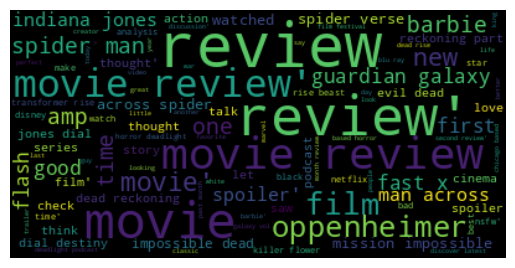

####################################################################################################
******For Subreddit movies*******


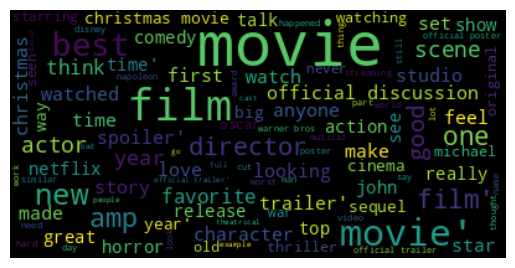

####################################################################################################
******For Subreddit TrueFilm*******


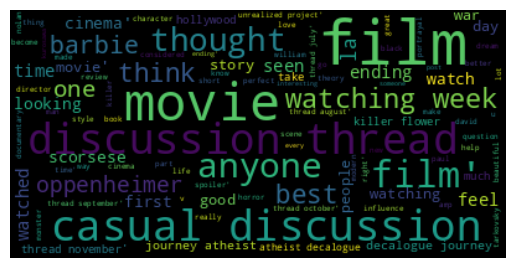

####################################################################################################
******For Subreddit boxoffice*******


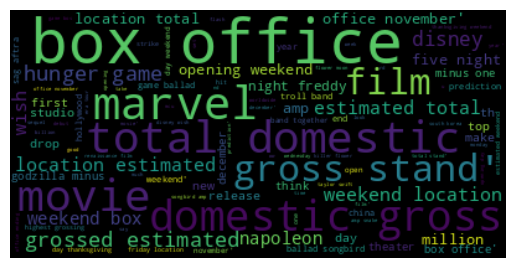

####################################################################################################
******For Subreddit IMDbFilmGeneral*******


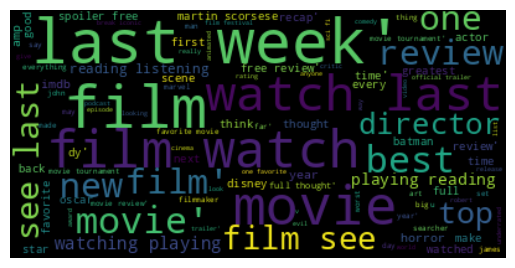

####################################################################################################
******For Subreddit horror*******


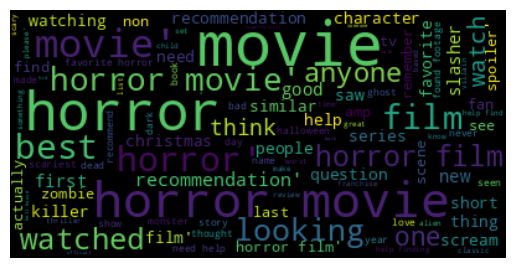

####################################################################################################
******For Subreddit scifi*******


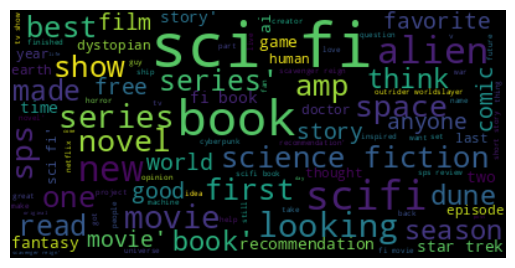

####################################################################################################
No data to plot for subreddit filmmakers.
******For Subreddit animation*******


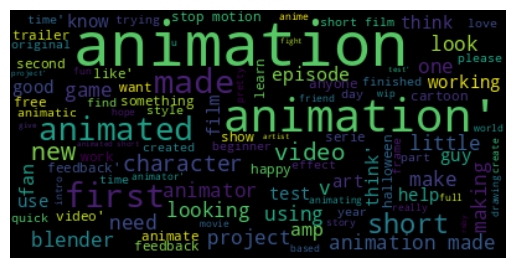

####################################################################################################
******For Subreddit DC_Cinematic*******


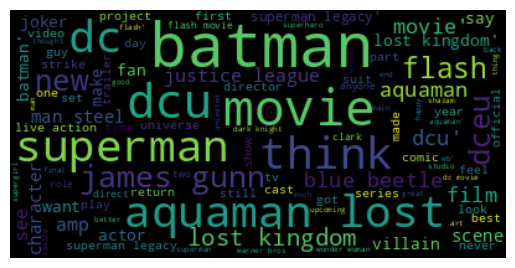

####################################################################################################
******For Subreddit Marvel*******


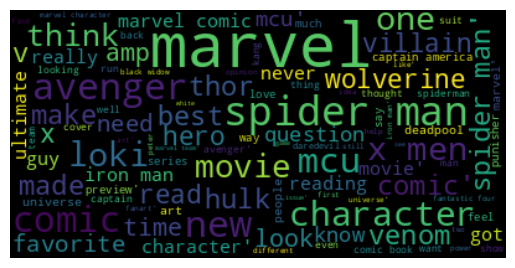

####################################################################################################
******For Subreddit StarWars*******


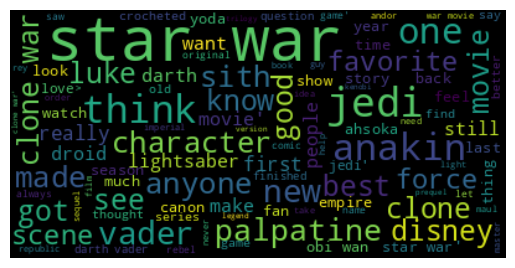

####################################################################################################
******For Subreddit JamesBond*******


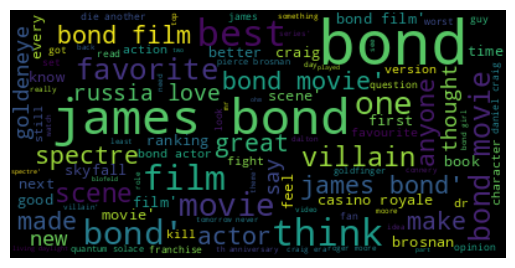

####################################################################################################
No data to plot for subreddit pixar.
******For Subreddit lotr*******


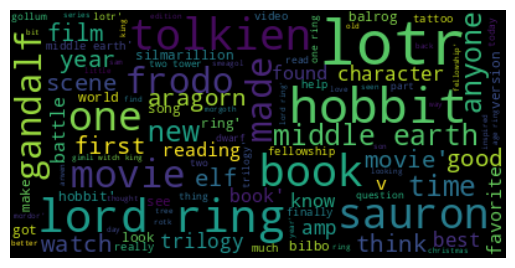

####################################################################################################
******For Subreddit harrypotter*******


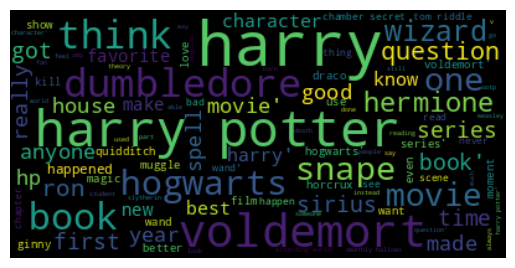

####################################################################################################
******For Subreddit flicks*******


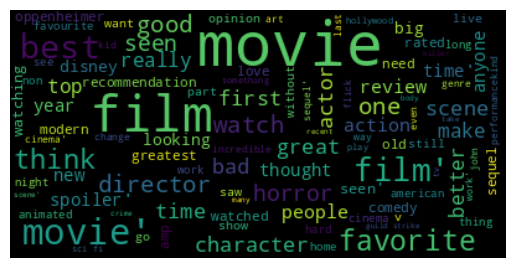

####################################################################################################
******For Subreddit MovieSuggestions*******


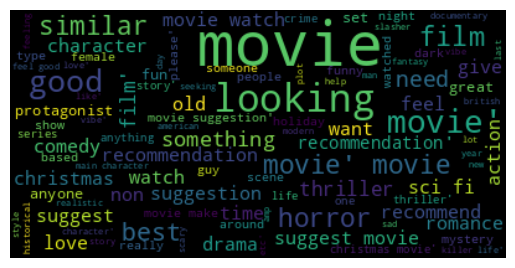

####################################################################################################
******For Subreddit Godfather*******


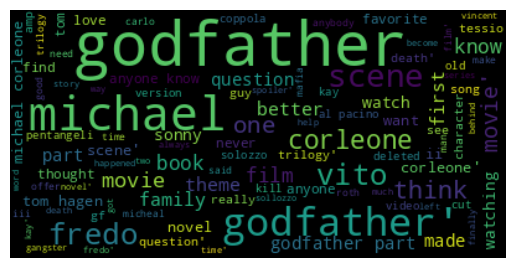

####################################################################################################
******For Subreddit SpiritedAway*******


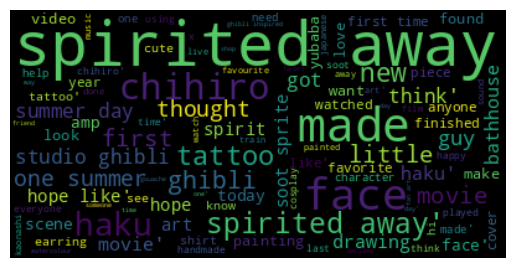

####################################################################################################
******For Subreddit TheDarkKnightRises*******


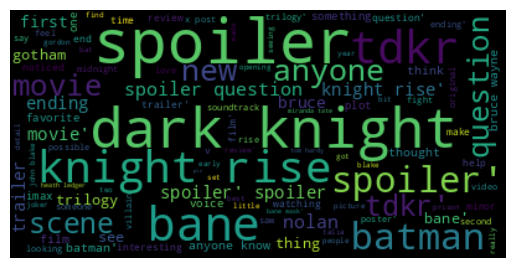

####################################################################################################
******For Subreddit pulpfiction*******


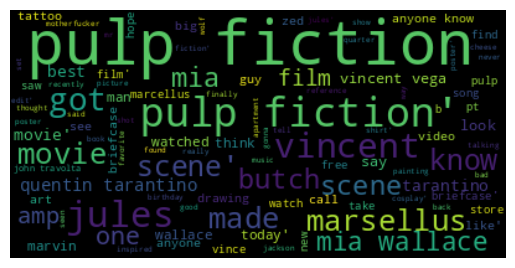

####################################################################################################
******For Subreddit TheLordOfTheRings*******


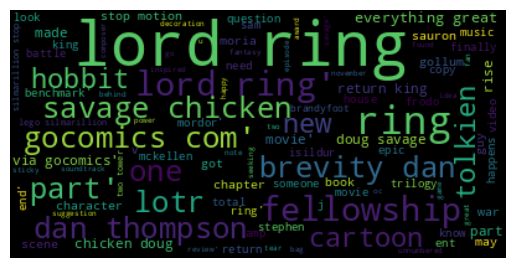

####################################################################################################
******For Subreddit goodfellas*******


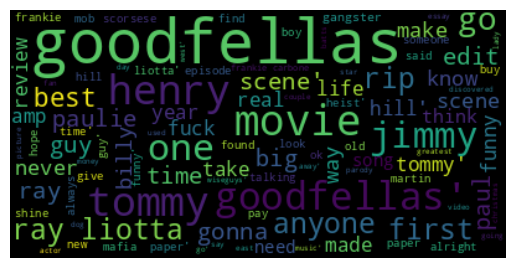

####################################################################################################
******For Subreddit fightclub*******


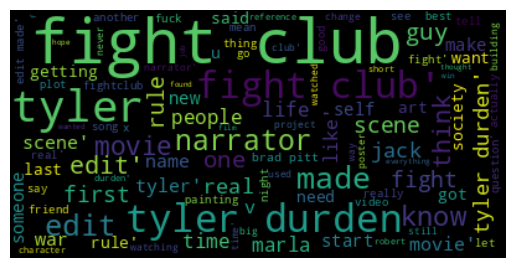

####################################################################################################
******For Subreddit interstellar*******


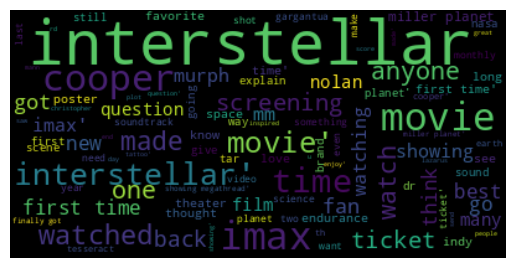

####################################################################################################


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,4), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_most_frequent_ngrams(corpus, n=30):
    top_ngrams = get_top_n3_words(corpus, n)
    top_df = pd.DataFrame(top_ngrams, columns=["N-gram", "Freq"])
    sns.set(rc={'figure.figsize':(13,8)})
    plot = sns.barplot(x="N-gram", y="Freq", data=top_df)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=70)
    plt.show() 


    
def preprocess_text(text, stop_words):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

def analyze_subreddits(df, subreddit_list, stop_words):
    filter_df =df[df['subreddit'].notna()]
    filter_df =filter_df[filter_df['title'].notna()]
    for subreddit in subreddit_list:
        
        sub_df = filter_df[filter_df['subreddit'] == subreddit]
        corpus = [preprocess_text(title, stop_words) for title in sub_df['title']]

        # Check if the corpus is not empty
        if any(corpus):
            print(f"******For Subreddit {subreddit}*******")
            wordcloud(corpus)
            # plot_most_frequent_ngrams(corpus)
            print("#" * 100)
        else:
            print(f"No data to plot for subreddit {subreddit}.")

subreddit_list1 = ['example_subreddit1', 'example_subreddit2']
analyze_subreddits(df, subreddit_list, stop_words)

Extracting all the commonly used phrase from each subreddit and their count

In [20]:
db=client['movieData']
db.reddit.count_documents({})

38898

In [21]:
col = db["reddit"]
 
x = col.find_one()
 
print(x)

cursor = db["reddit"].find()

df_ =  pd.DataFrame(list(cursor))

x = col.find({},{'subreddit': 1})

{'_id': ObjectId('6541b0ebe5cc1395cd469529'), 'id': '13as8jr', 'subreddit_id': 't5_2r23w', 'subreddit': 'moviereviews', 'text': '# This Reddit group is going to have a revamp in the coming days. Please be patient &amp; Also. \n\n* Only Movies Related Review content will be posted here (Links, Thread, Videos, Images, etc)\n* We are looking for Moderator ( In Exchange we will **provide VIP membership** to [https://simkl.com/](https://simkl.com/) (DM me Directly)', 'author_fullname': 't2_29i1c4k9', 'title': 'Announcement: Changes, Looking for Mods, Join Discord, SIMKL Reviews', 'upvote_ratio': 0.99, 'domain': 'self.moviereviews', 'created_date': datetime.datetime(2023, 11, 1, 1, 59, 7, 181000), 'number_of_comments': 0}


In [22]:
df_

_id       id subreddit_id        subreddit  \
0      6541b0ebe5cc1395cd469529  13as8jr     t5_2r23w     moviereviews   
1      6541b0ece5cc1395cd469544  17g64b5     t5_2qh3s           movies   
2      6541b0ece5cc1395cd46955f  17kz71q     t5_2szp0         TrueFilm   
3      6541b0ede5cc1395cd469579  17jsulh     t5_2r1ky        boxoffice   
4      6541b0eee5cc1395cd469594  17jx0p4     t5_3iwyp  IMDbFilmGeneral   
...                         ...      ...          ...              ...   
38893  656d064264b5eec072de4add  k69h26l     t5_2rsg9        JamesBond   
38894  656d064364b5eec072de4af6  k5z2kda     t5_2rsg9        JamesBond   
38895  656d064564b5eec072de4b0a  k5swcqh     t5_2rsg9        JamesBond   
38896  656d064664b5eec072de4b10  k5k48fg     t5_2rsg9        JamesBond   
38897  656d066364b5eec072de4bc5  k5bikmm     t5_2rsg9        JamesBond   

                                                    text author_fullname  \
0      # This Reddit group is going to have a revamp ...     t2_29i1c4k9   
1      The way this works is that you post a review o...      t2_3zi4nxr   
2      General Discussion threads threads are meant f...        t2_6l4z3   
3      (1) Here's your thread to predict this upcomin...        t2_6l4z3   
4      House of Frankenstein - 6 / 10\n\nHouse of Dra...       t2_151s5v   
...                                                  ...             ...   
38893                                               None      t2_593dngq   
38894                                               None     t2_2m382kiq   
38895                                               None       t2_16m6k4   
38896                                               None     t2_9v4uytve   
38897                                               None     t2_9yivnnif   

                                                   title  upvote_ratio  \
0      Announcement: Changes, Looking for Mods, Join ...          0.99   
1      What is the Best Film You Watched Last Week? (...          0.78   
2           Casual Discussion Thread (November 01, 2023)          0.99   
3      Weekend Prediction Thread &amp; Casual Box Off...          0.95   
4      What Films Did You See Last Week? (10.23 - 10....          1.00   
...                                                  ...           ...   
38893                                               None           NaN   
38894                                               None           NaN   
38895                                               None           NaN   
38896                                               None           NaN   
38897                                               None           NaN   

                     domain            created_date  number_of_comments  \
0         self.moviereviews 2023-11-01 01:59:07.181                 0.0   
1               self.movies 2023-11-01 01:59:08.046                 NaN   
2             self.TrueFilm 2023-11-01 01:59:08.951                24.0   
3            self.boxoffice 2023-11-01 01:59:09.864                 NaN   
4      self.IMDbFilmGeneral 2023-11-01 01:59:10.744                 5.0   
...                     ...                     ...                 ...   
38893                  None 2023-12-03 22:50:42.144                 NaN   
38894                  None 2023-12-03 22:50:43.676                 NaN   
38895                  None 2023-12-03 22:50:45.054                 NaN   
38896                  None 2023-12-03 22:50:46.944                 NaN   
38897                  None 2023-12-03 22:51:15.305                 NaN   

        reddit_date parent_id  
0               NaN       NaN  
1               NaN       NaN  
2               NaN       NaN  
3               NaN       NaN  
4               NaN       NaN  
...             ...       ...  
38893  1.698162e+09   17f82i4  
38894  1.697987e+09   17dvedb  
38895  1.697875e+09   17cwg5l  
38896  1.697730e+09   17bkhi9  
38897  1.697580e+09   17a7nfr  

[38898 rows x 13 columns]

In [23]:
df_.describe(include='all')

_id       id subreddit_id  subreddit   text  \
count                      38898    38898        38898      38898  27060   
unique                     38898    38897           36         36  16259   
top     6541b0ebe5cc1395cd469529  183mduy     t5_2r1ky  boxoffice          
freq                           1        2         2853       2853  10636   
first                        NaN      NaN          NaN        NaN    NaN   
last                         NaN      NaN          NaN        NaN    NaN   
mean                         NaN      NaN          NaN        NaN    NaN   
std                          NaN      NaN          NaN        NaN    NaN   
min                          NaN      NaN          NaN        NaN    NaN   
25%                          NaN      NaN          NaN        NaN    NaN   
50%                          NaN      NaN          NaN        NaN    NaN   
75%                          NaN      NaN          NaN        NaN    NaN   
max                          NaN      NaN          NaN        NaN    NaN   

       author_fullname     title  upvote_ratio     domain  \
count            38138     27060  27060.000000      27060   
unique           22787     26715           NaN        633   
top           t2_6l4z3  Question           NaN  i.redd.it   
freq               520        14           NaN       4611   
first              NaN       NaN           NaN        NaN   
last               NaN       NaN           NaN        NaN   
mean               NaN       NaN      0.807458        NaN   
std                NaN       NaN      0.209520        NaN   
min                NaN       NaN      0.040000        NaN   
25%                NaN       NaN      0.700000        NaN   
50%                NaN       NaN      0.880000        NaN   
75%                NaN       NaN      0.980000        NaN   
max                NaN       NaN      1.000000        NaN   

                      created_date  number_of_comments   reddit_date parent_id  
count                        38898        20334.000000  3.782300e+04     11838  
unique                       38885                 NaN           NaN      9777  
top     2023-12-03 21:23:14.989000                 NaN           NaN   17g64b5  
freq                             2                 NaN           NaN         2  
first   2023-11-01 01:59:07.181000                 NaN           NaN       NaN  
last    2023-12-03 22:51:15.305000                 NaN           NaN       NaN  
mean                           NaN           33.596439  1.687211e+09       NaN  
std                            NaN          122.212660  4.697466e+07       NaN  
min                            NaN            0.000000  1.281013e+09       NaN  
25%                            NaN            1.000000  1.695565e+09       NaN  
50%                            NaN            6.000000  1.699455e+09       NaN  
75%                            NaN           21.000000  1.700599e+09       NaN  
max                            NaN         5617.000000  1.701643e+09       NaN

In [24]:
df_.describe()

upvote_ratio  number_of_comments   reddit_date
count  27060.000000        20334.000000  3.782300e+04
mean       0.807458           33.596439  1.687211e+09
std        0.209520          122.212660  4.697466e+07
min        0.040000            0.000000  1.281013e+09
25%        0.700000            1.000000  1.695565e+09
50%        0.880000            6.000000  1.699455e+09
75%        0.980000           21.000000  1.700599e+09
max        1.000000         5617.000000  1.701643e+09

Number of posts per subreddit

In [25]:
df_no_of_post_by_subreddit=df_['subreddit'].value_counts().to_frame("no_of_post_by_subreddit").head(20)

           subreddit  no_of_post_by_subreddit
1          animation                     2380
2             Marvel                     2336
3        harrypotter                     2184
4             horror                     2122
5              scifi                     2024
6               lotr                     1999
7           StarWars                     1985
8          JamesBond                     1900
9         Filmmakers                     1892
10      DC_Cinematic                     1839
11  MovieSuggestions                     1677
12            movies                     1676
13   IMDbFilmGeneral                     1564
14            flicks                     1420
15      moviereviews                     1273
16          TrueFilm                     1268
17             Pixar                      928
18      SpiritedAway                      594
19         Godfather                      593


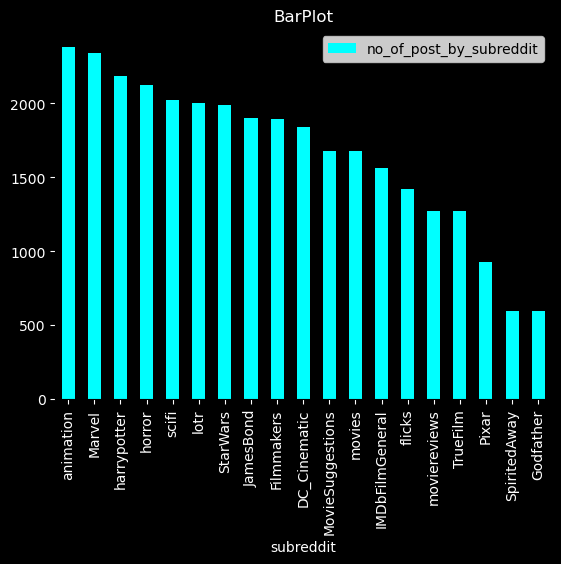

In [26]:
updated_df = pd.DataFrame(df_no_of_post_by_subreddit).reset_index()
updated_df.columns = ['subreddit', 'no_of_post_by_subreddit']


updated_df = updated_df.drop(labels=0, axis=0)
print(updated_df)
ax = updated_df.plot(kind = 'bar',
        x = 'subreddit',
        y = 'no_of_post_by_subreddit',
        color = 'cyan')

plt.gcf().set_facecolor('black')

ax.set_facecolor('black')

ax.tick_params(colors='white', which='both') # 'both' refers to both x and y axes
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set the title and its color (if you have a title)
ax.set_title('Your Title Here', color='white')
  
# set the title
plt.title('BarPlot')
  
# show the plot
plt.show()

Line plot between subreddit and number of comments

          subreddit  number_of_comments
0            horror                2039
1       harrypotter                1944
2         boxoffice                1905
3        Filmmakers                1691
4  MovieSuggestions                1677
5              lotr                1541
6             scifi                1514
7            Marvel                1481
8          StarWars                1452
9         JamesBond                1445


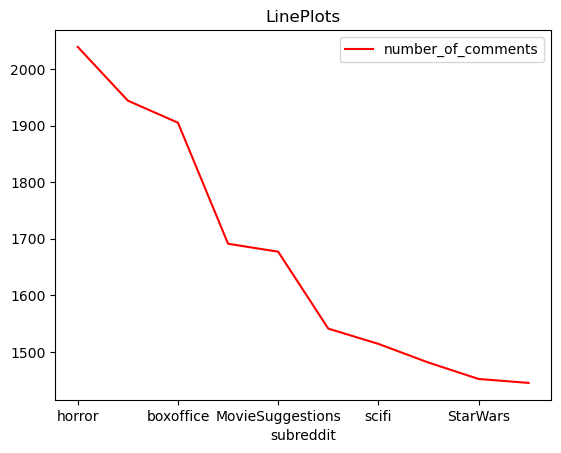

In [27]:
df_comments=df_[df_['text']!='']['subreddit'].value_counts().to_frame('number_of_comments').head(10)

updated_df_comments = pd.DataFrame(df_comments).reset_index()
updated_df_comments.columns = ['subreddit', 'number_of_comments']
print(updated_df_comments)
  
# line plot for physics marks
updated_df_comments.plot(kind = 'line',
        x = 'subreddit',
        y = 'number_of_comments',
        color = 'red')
  
# set the title
plt.title('LinePlots')
  
# show the plot
plt.show()

Number of comments from top 15 subreddits

In [28]:
#no. of comments for top 10subreddit
df_[df_['text']!='']['subreddit'].value_counts().to_frame('number_of_comments').head(15)

number_of_comments
horror                          2039
harrypotter                     1944
boxoffice                       1905
Filmmakers                      1691
MovieSuggestions                1677
lotr                            1541
scifi                           1514
Marvel                          1481
StarWars                        1452
JamesBond                       1445
flicks                          1400
movies                          1385
animation                       1299
TrueFilm                        1267
DC_Cinematic                    1195

In [29]:
df_['domain'].value_counts().to_frame("no_of_post_from_domain").head(15)

no_of_post_from_domain
i.redd.it                                4611
reddit.com                               1551
youtu.be                                 1364
self.harrypotter                         1275
v.redd.it                                1256
self.horror                              1167
self.MovieSuggestions                    1123
youtube.com                              1012
self.flicks                               913
self.Filmmakers                           899
self.movies                               781
self.TrueFilm                             724
self.StarWars                             681
self.lotr                                 670
self.boxoffice                            638

In [30]:
userDict={}
for index, row in df_.iterrows():
    if row["_id"] in userDict:
        userDict[row["_id"]]+=1
    else:
        userDict[row["_id"]]=1

print(len(userDict))


df_['text']!=''

38898


0        True
1        True
2        True
3        True
4        True
         ... 
38893    True
38894    True
38895    True
38896    True
38897    True
Name: text, Length: 38898, dtype: bool

Top 20 authors

In [31]:
df_['author_fullname'].value_counts().to_frame("author_count").head(20)

author_count
t2_6l4z3              520
t2_1534ii             395
t2_ru4f1trw           341
t2_151s5v             144
t2_22v2n3mu           115
t2_zdyei               93
t2_yzgfz               85
t2_165g7s              85
t2_4a27h               84
t2_5adwlxvn            81
t2_15cr83              80
t2_v1y6gt1k            80
t2_9kcmuu85            69
t2_7v5pcd6i            68
t2_guiqi6nt            67
t2_29v9l70j            66
t2_15wcpm              63
t2_7k9iqm7             59
t2_43d6edpt            57
t2_2x34fvr4            51

In [32]:
df_.count()

_id                   38898
id                    38898
subreddit_id          38898
subreddit             38898
text                  27060
author_fullname       38138
title                 27060
upvote_ratio          27060
domain                27060
created_date          38898
number_of_comments    20334
reddit_date           37823
parent_id             11838
dtype: int64

### Descriptive Analysis of Reddit Dataset

In [38]:
df_reddit.shape

(38898, 14)

### TMDB & Reddit Preprocessing using preprocessor library in python
##### It supports cleaning, tokenizing and parsing of URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis and Smileys

In [43]:
df_reddit['text'] = df_reddit['text'].str.lower()
df_reddit.head(5)

_id       id subreddit_id        subreddit  \
0  6541b0ebe5cc1395cd469529  13as8jr     t5_2r23w     moviereviews   
1  6541b0ece5cc1395cd469544  17g64b5     t5_2qh3s           movies   
2  6541b0ece5cc1395cd46955f  17kz71q     t5_2szp0         TrueFilm   
3  6541b0ede5cc1395cd469579  17jsulh     t5_2r1ky        boxoffice   
4  6541b0eee5cc1395cd469594  17jx0p4     t5_3iwyp  IMDbFilmGeneral   

                                                text author_fullname  \
0  # this reddit group is going to have a revamp ...     t2_29i1c4k9   
1  the way this works is that you post a review o...      t2_3zi4nxr   
2  general discussion threads threads are meant f...        t2_6l4z3   
3  (1) here's your thread to predict this upcomin...        t2_6l4z3   
4  house of frankenstein - 6 / 10\n\nhouse of dra...       t2_151s5v   

                                               title  upvote_ratio  \
0  Announcement: Changes, Looking for Mods, Join ...          0.99   
1  What is the Best Film You Watched Last Week? (...          0.78   
2       Casual Discussion Thread (November 01, 2023)          0.99   
3  Weekend Prediction Thread &amp; Casual Box Off...          0.95   
4  What Films Did You See Last Week? (10.23 - 10....          1.00   

                 domain            created_date  number_of_comments  \
0     self.moviereviews 2023-11-01 01:59:07.181                 0.0   
1           self.movies 2023-11-01 01:59:08.046                 NaN   
2         self.TrueFilm 2023-11-01 01:59:08.951                24.0   
3        self.boxoffice 2023-11-01 01:59:09.864                 NaN   
4  self.IMDbFilmGeneral 2023-11-01 01:59:10.744                 5.0   

  reddit_date parent_id  word_count  
0  2023-11-01       NaN           9  
1  2023-11-01       NaN          10  
2  2023-11-01       NaN           6  
3  2023-11-01       NaN           8  
4  2023-11-01       NaN          10

In [44]:
tmdb_collection = mydb['tmdb_data']
datapoints = list(tmdb_collection.find({}))

dataframe = json_normalize(datapoints)

dataframe.to_pickle("tmdb_data.pkl")

df_tmdb = pd.read_pickle("tmdb_data.pkl")

In [45]:
top_movie_names = df_tmdb['title'].head(100).unique()
top_movie_names = list((map(lambda x: x.lower(), top_movie_names)))
top_movie_names

["five nights at freddy's",
 'the nun ii',
 'saw x',
 'the exorcist: believer',
 'fast x',
 'the equalizer 3',
 'retribution',
 'expend4bles',
 'mission: impossible - dead reckoning part one',
 'gran turismo',
 'sound of freedom',
 'muzzle',
 'desperation road',
 'once upon a studio',
 'coco',
 'meg 2: the trench',
 'uri: the surgical strike',
 'talk to me',
 'sila ay akin',
 'blue beetle',
 'paw patrol: the mighty movie',
 'мавка: лісова пісня',
 'sniper: g.r.i.t. - global response & intelligence team',
 'boudica',
 'oppenheimer',
 'the marvels',
 'sentinelle',
 'babylon a.d.',
 'the baker',
 'space wars: quest for the deepstar',
 'breakout',
 'barbie',
 'elemental',
 'ナックルガール',
 'after everything',
 'texas chainsaw 3d',
 'transformers: rise of the beasts',
 'sanctuary',
 'ആര്\u200dഡിഎക്സ്: റോബര്\u200dട്ട് ഡോണി സേവ്യര്\u200d',
 'teenage mutant ninja turtles: mutant mayhem',
 'meteor storm',
 'night train',
 'inside out',
 'spider-man: across the spider-verse',
 'ワンピース エピソード オブ 空島',
 '

### Count the number of reddits in which a specific Movie is mentioned & count the frequency for each movie

In [46]:
import re
frequency_of_posts = {}
df_reddit = df_reddit[df_reddit['text'].notna()]
for movie in top_movie_names:
    frequency_of_posts[movie] = df_reddit[df_reddit['text'].str.contains(movie, flags=re.IGNORECASE, regex=True)].shape[0]

sorted_dict_movie_frequency = dict( sorted(frequency_of_posts.items(),
                           key=lambda item: item[1],
                           reverse=True))
sorted_dict_movie_frequency

{'the marvels': 166,
 'trick': 158,
 'oppenheimer': 148,
 'the flash': 125,
 'barbie': 112,
 'elemental': 110,
 'nowhere': 102,
 'the killer': 94,
 'umma': 88,
 'killers of the flower moon': 63,
 'inside out': 58,
 'the creator': 55,
 'blue beetle': 48,
 'radical': 46,
 'surrounded': 34,
 'the little mermaid': 34,
 'talk to me': 30,
 'coco': 29,
 'trolls band together': 28,
 "five nights at freddy's": 24,
 'bottoms': 20,
 'saw x': 19,
 'the exorcist: believer': 18,
 'spider-man: across the spider-verse': 18,
 'spider-man: no way home': 17,
 'a haunting in venice': 16,
 'guardians of the galaxy vol. 3': 15,
 'gran turismo': 14,
 'skinamarink': 14,
 'breakout': 13,
 'indiana jones and the dial of destiny': 13,
 'fast x': 12,
 'paw patrol: the mighty movie': 12,
 'avatar: the way of water': 11,
 'the nun ii': 10,
 'sanctuary': 10,
 'the super mario bros. movie': 10,
 'the engineer': 9,
 'resurrected': 9,
 'the last voyage of the demeter': 9,
 'hypnotic': 9,
 'sound of freedom': 8,
 'retri

### Consider Top 20 Movies based on TMDB data to calculate polarity of reddits for the particular movie

In [47]:
import itertools 
top_movies = dict(itertools.islice(sorted_dict_movie_frequency.items(), 20))

### For each movie, create a separate dataframe to store the respective reddits

In [48]:
list_of_dfs = {}
for key, value in top_movies.items():
    df_name = '_'.join(key.split()) + '_df'
    list_of_dfs[df_name]  = df_reddit[df_reddit['text'].str.contains(key, flags=re.IGNORECASE, regex=True)]

In [49]:
list_of_dfs.keys()

dict_keys(['the_marvels_df', 'trick_df', 'oppenheimer_df', 'the_flash_df', 'barbie_df', 'elemental_df', 'nowhere_df', 'the_killer_df', 'umma_df', 'killers_of_the_flower_moon_df', 'inside_out_df', 'the_creator_df', 'blue_beetle_df', 'radical_df', 'surrounded_df', 'the_little_mermaid_df', 'talk_to_me_df', 'coco_df', 'trolls_band_together_df', "five_nights_at_freddy's_df"])

#### For each Movie, we calculate polarity score (positive, negative, neutral) for all its reddits 

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for df_name in list_of_dfs.keys():
    analyzer = SentimentIntensityAnalyzer()
    list_of_dfs[df_name]['rating'] = list_of_dfs[df_name]['text'].apply(analyzer.polarity_scores)
    list_of_dfs[df_name] = pd.concat([list_of_dfs[df_name].drop(['rating'], axis=1), list_of_dfs[df_name]['rating'].apply(pd.Series)], axis=1)

### Based on the polarity scores, we mark the hype of the tweet as positive, negative and neutral

In [51]:
def calculate_hype(row):
    if (row['neg'] >= row['neu']) and (row['neg'] >= row['pos']):
        largest = 'negative'
  
    elif (row['pos'] >= row['neg']) and (row['pos'] >= row['neu']):
        largest = 'positive'
    
    elif(row['neu'] - row['neg'] <= 0.5):
        largest = 'negative'
    elif(row['neu'] - row['pos'] <= 0.5):
        largest = 'positive'
    else:
        largest = 'neutral'
          
    return largest

In [52]:
for df_name in list_of_dfs.keys():
    list_of_dfs[df_name]['hype'] = list_of_dfs[df_name].apply(calculate_hype, axis=1)

#### For instance, the Oppenheimer dataframe looks something like this...

In [53]:
list_of_dfs['oppenheimer_df']

_id       id subreddit_id     subreddit  \
702    6543e2a5424bbcb3b9f115d7  17l8ef2     t5_2uiee        flicks   
878    6553c7698e480a9289d914bf  17v645u     t5_2r1ky     boxoffice   
895    6553c7738e480a9289d9161a  17utwry     t5_2szp0      TrueFilm   
981    6553c9c08e480a9289d91c04  17uhg74     t5_2uiee        flicks   
1126   65540e392b54fa221b95dc83  17qtruk     t5_2r1ky     boxoffice   
...                         ...      ...          ...           ...   
32524  656ce7f3f51a603b1b342086  17h7v4f     t5_2w1k9  interstellar   
34487  656cf113f51a603b1b3455b5  1891u2e     t5_2w1k9  interstellar   
35638  656cf648f51a603b1b3475cf  17l6ihh     t5_2rsce     Inception   
37421  656cff1ef51a603b1b349a45  188u5wl     t5_2w1k9  interstellar   
37446  656cff32f51a603b1b349b2e  15rq8tc     t5_2w1k9  interstellar   

                                                    text author_fullname  \
702    here we go again, the blatant disregard for we...    t2_lfdccs7cb   
878    &amp;#x200b;\n\nhttps://preview.redd.it/9qaglo...        t2_cuor9   
895    just posing a question about a trend i've noti...     t2_3rfvfj63   
981    my ranking is as following:\n\n1. babylon - 9....     t2_91vacd5j   
1126   &amp;#x200b;\n\nhttps://preview.redd.it/wx1nt1...        t2_cuor9   
...                                                  ...             ...   
32524  i remember my chemistry teacher telling me in ...     t2_dak41eut   
34487  so interstellar in 15/70 imax was such an amaz...     t2_8g2u47oe   
35638  after the recent success of oppenheimer my loc...     t2_tmdbqf8z   
37421  the theater manager asked how many people saw ...     t2_edosndrz   
37446  watched for the first time last weekend since ...     t2_3v11lmme   

                                                   title  upvote_ratio  \
702    Why is Asteroid City (Wes Anderson) struggling...          0.25   
878    In China The Marvels continues frefalling on T...          0.93   
895    Has the fast-paced and short-length social med...          0.77   
981    How would you rank every 2023 movie you’ve see...          0.40   
1126   In China The Marvels OD PS hit $520k. Running ...          0.94   
...                                                  ...           ...   
32524           The imax experience is a sight to behold          0.98   
34487                              So Indy Was A Success          0.99   
35638                                        I'm excited          0.95   
37421                                         IMAX Indy!          1.00   
37446  Put off watching since release since someone s...          0.97   

                  domain            created_date  number_of_comments  \
702          self.flicks 2023-11-02 17:55:49.115                17.0   
878       self.boxoffice 2023-11-14 19:15:53.347                 NaN   
895        self.TrueFilm 2023-11-14 19:16:03.164                17.0   
981          self.flicks 2023-11-14 19:25:52.730               102.0   
1126      self.boxoffice 2023-11-15 00:18:01.161                 NaN   
...                  ...                     ...                 ...   
32524          i.redd.it 2023-12-03 20:41:23.926                13.0   
34487  self.interstellar 2023-12-03 21:20:19.820                 7.0   
35638     self.Inception 2023-12-03 21:42:32.489                 7.0   
37421         reddit.com 2023-12-03 22:20:14.546                 7.0   
37446  self.interstellar 2023-12-03 22:20:34.862                11.0   

      reddit_date parent_id  word_count    neg    neu    pos  compound  \
702    2023-11-02       NaN          10  0.091  0.709  0.200    0.9542   
878    2023-11-14       NaN          43  0.047  0.897  0.056    0.5100   
895    2023-11-14       NaN          11  0.015  0.931  0.053    0.7906   
981    2023-11-14       NaN          11  0.028  0.938  0.034    0.1280   
1126   2023-11-15       NaN          46  0.045  0.871  0.084    0.9794   
...           ...       ...         ...    ...    ...    ...    

### Calculate the number of positive, negative and neutral reddits for all Top 20 movies

In [107]:
movies_polarity_frequency = []
for df_name in list_of_dfs.keys():
    try:
        frequency_values = list_of_dfs[df_name]['hype'].value_counts()
        frequency_values_dict = {'movie_name': df_name, 'neutral' : frequency_values['neutral'], 'positive': frequency_values['positive'], 'negative': frequency_values['negative'] }
        movies_polarity_frequency.append(frequency_values_dict)
    except Exception as error:
        #print(error)
        pass
movies_polarity_frequency_df = pd.DataFrame(movies_polarity_frequency)

In [108]:
movies_polarity_frequency_df.head(20)

movie_name  neutral  positive  negative
0                  the_marvels_df      150         8         6
1                        trick_df      130         4        10
2                  oppenheimer_df      129         7         1
3                    the_flash_df      109         4         8
4                       barbie_df      102         6         3
5                    elemental_df      100         8         1
6                      nowhere_df       87         3         5
7                   the_killer_df       66         6        22
8                         umma_df       76         3         2
9   killers_of_the_flower_moon_df       58         2         2
10                  inside_out_df       54         2         2
11                 the_creator_df       49         2         2
12                 blue_beetle_df       45         1         2
13                     radical_df       41         2         1
14                  talk_to_me_df       23         3         3

### Visualizing for Top 10 Popular movies based on their Positive and Negative Hype

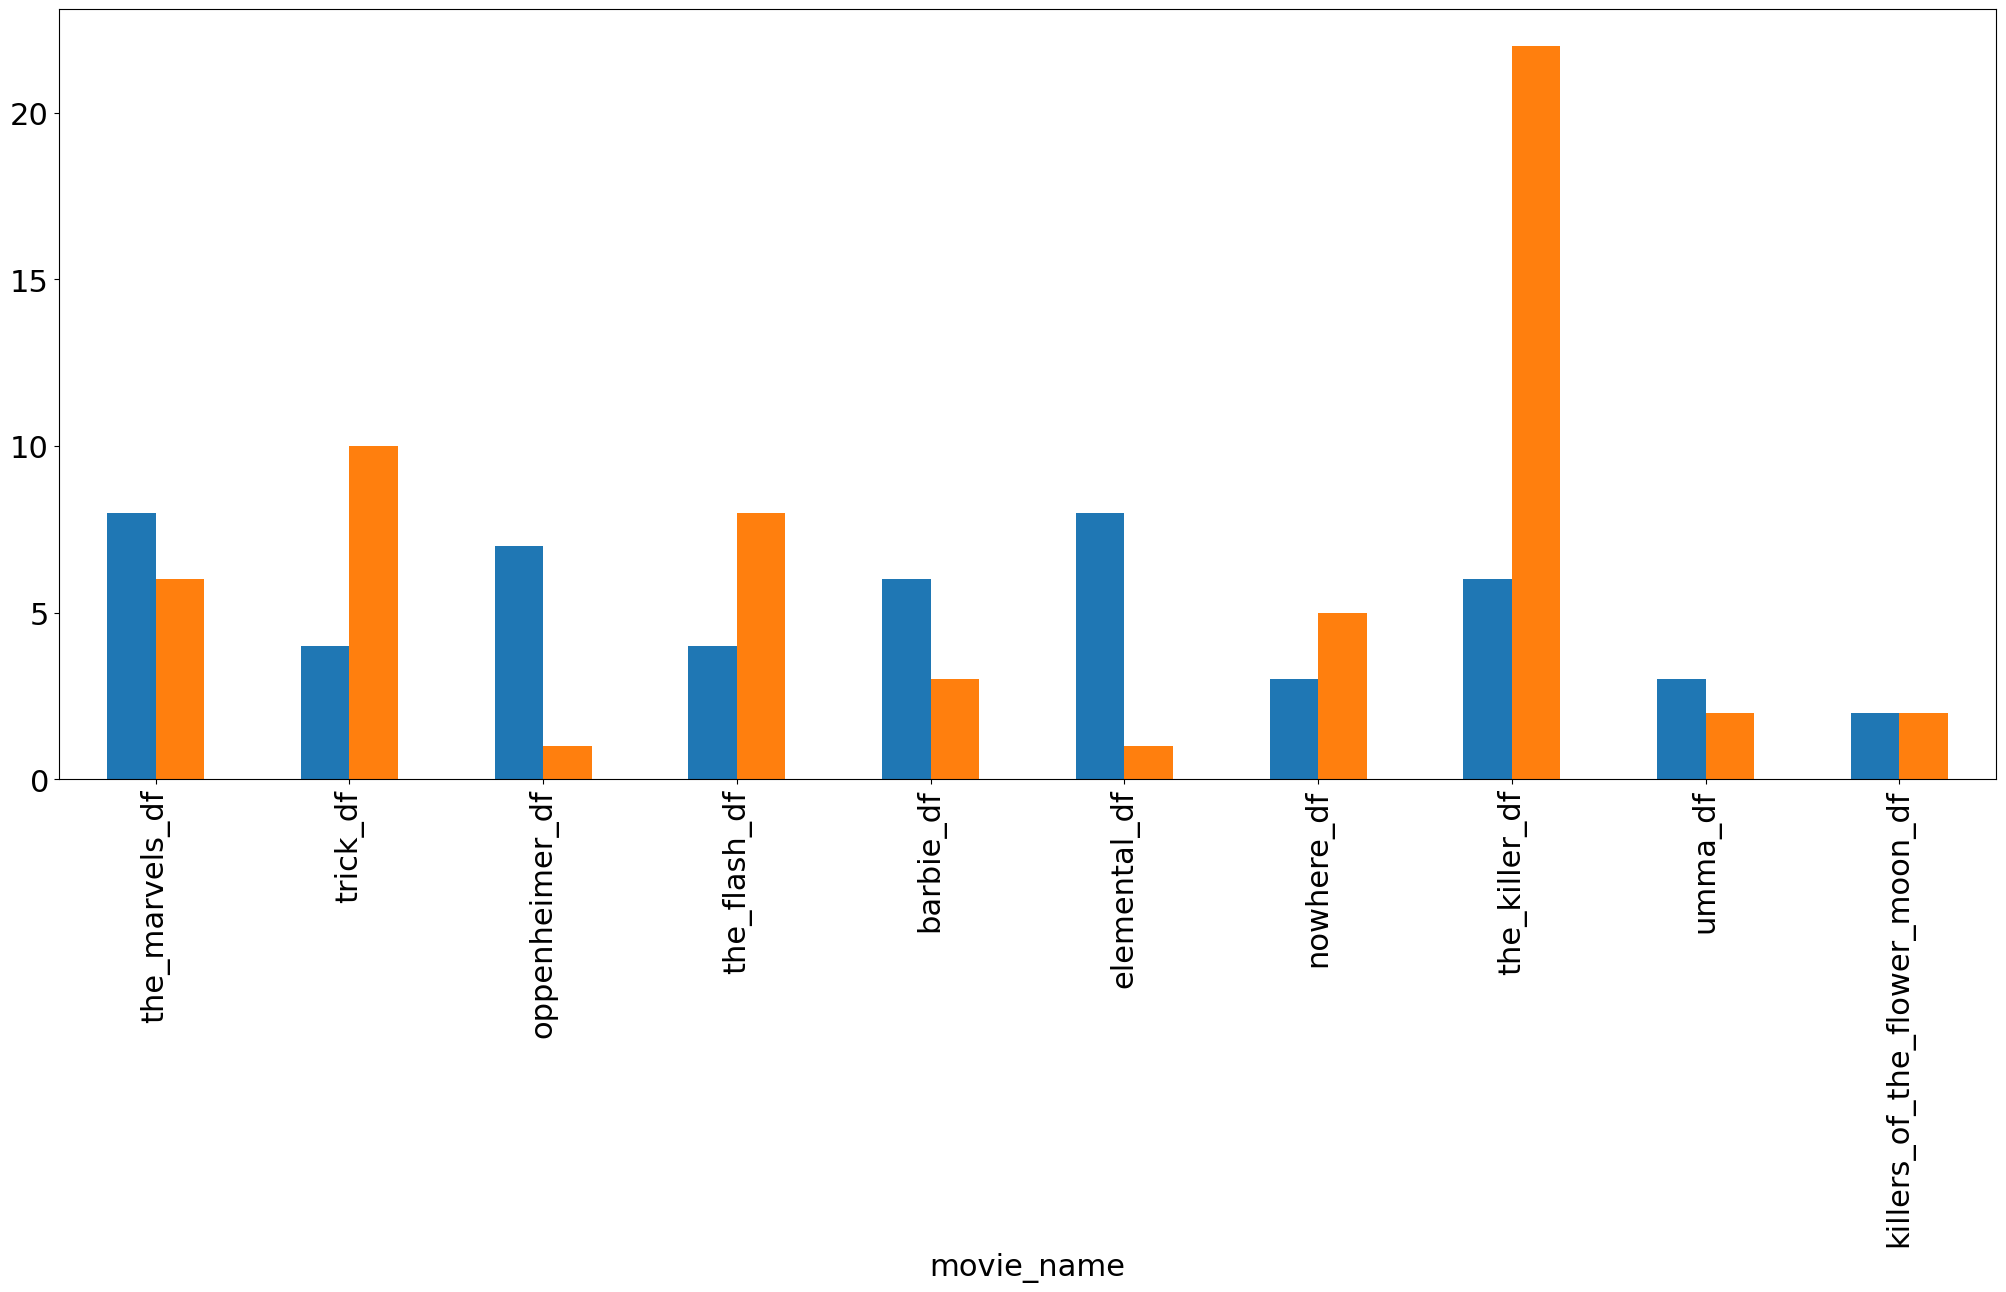

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
movies_polarity_frequency_df_plot = movies_polarity_frequency_df.head(10)
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 22})
movies_polarity_frequency_df_plot.plot(x='movie_name', y=['positive', 'negative'], kind='bar', legend=False)
plt.show()